Understand the problem and  dataset

In [12]:
import pandas as pd

# Specify the file path
file_path = 'analyst_Data.xlsx'  # Replace 'your_file.xlsx' with the actual file path

# Read the Excel file
studentsdata = pd.read_excel(file_path)

# Display the first few rows of the DataFrame
print(studentsdata.head())


  First Name           Email ID  Quantity                  Events  \
0     ANIKET     aniket@xyz.com         1  Art of Resume Building   
1  Dhanshree  dhanshree@xyz.com         1  Art of Resume Building   
2     Dhiraj     dhiraj@xyz.com         1  Art of Resume Building   
3      Pooja      pooja@xyz.com         1  Art of Resume Building   
4     Aayush     aayush@xyz.com         1  Art of Resume Building   

  Attendee Status                                       College Name  \
0       Attending  D Y PATIL INSTITUTE OF MCA AND MANAGEMENT AKUR...   
1       Attending                   AP SHAH INSTITUTE OF TECHNOLOGY    
2       Attending       Don Bosco College of Engineering Fatorda Goa   
3       Attending           Pillai College of Engineering New Panvel   
4       Attending                               St Xavier's College    

        How did you come to know about this event?  \
0                                            Email   
1                                           

In [13]:
#DATA EXPLORATION 


In [14]:
# 1. How many unique students are included in the dataset?

unique_students = studentsdata['First Name'].nunique()
print("Number of unique students:", unique_students)

# 2. What is the average GPA of the students?
average_gpa = studentsdata['CGPA'].mean()
print("Average GPA of the students:", average_gpa)



Number of unique students: 2324
Average GPA of the students: 8.038475684511647


DISTRIBUTION OF GRADUATION YEARS AND TOP 5 COLLEGES BY GPA

In [16]:
# 3. What is the distribution of students across different graduation years?
graduation_year_distribution = studentsdata['Year of Graduation'].value_counts()
print("Distribution of students across graduation years:\n", graduation_year_distribution)

# 4. What is the distribution of students' experience with Python programming?
python_experience_distribution = studentsdata['Experience with python (Months)'].value_counts()
print("Distribution of students' experience with Python programming:\n", python_experience_distribution)




Distribution of students across graduation years:
 Year of Graduation
2023    1536
2024    1511
2025    1292
2026     555
Name: count, dtype: int64
Distribution of students' experience with Python programming:
 Experience with python (Months)
5    1242
3    1008
8     800
6     738
7     640
4     466
Name: count, dtype: int64


SPOTTING RELATIONSHIPS

In [22]:
# 6. How does the GPA vary among different colleges?
gpa_by_college = studentsdata.groupby('College Name')['CGPA'].mean()
print("GPA variation among different colleges:\n", gpa_by_college)

# 7. What is the GPA for students from each city?
gpa_by_city = studentsdata.groupby('City')['CGPA'].mean()
print("GPA for students from each city:\n", gpa_by_city)


GPA variation among different colleges:
 College Name
A. C. Patil College of Engineering                                                   7.772973
ADHIYAMAAN COLLEGE OF ENGINEERING                                                    7.645455
AP SHAH INSTITUTE OF TECHNOLOGY                                                      8.283333
B. K. Birla College of Arts, Science & Commerce (Autonomous), Kalyan                 8.456410
CHHATTISGARH SWAMI VIVEKANANDA TECHNICAL UNIVERSITY TEACHING DEPARTMENT BHILAI       7.954545
D Y PATIL INSTITUTE OF MCA AND MANAGEMENT AKURDI PUNE                                8.266667
DKTE Society's Textile And Engineering Institute Ichalkaranji                        7.967568
Don Bosco College of Engineering Fatorda Goa                                         8.232143
G H Raisoni institut of engineering and technology pune                              7.889474
GOVERNMENT POLYTECHNIC GANDHINAGAR                                                   7.755000
KLE So

DATA VISUALIZATION

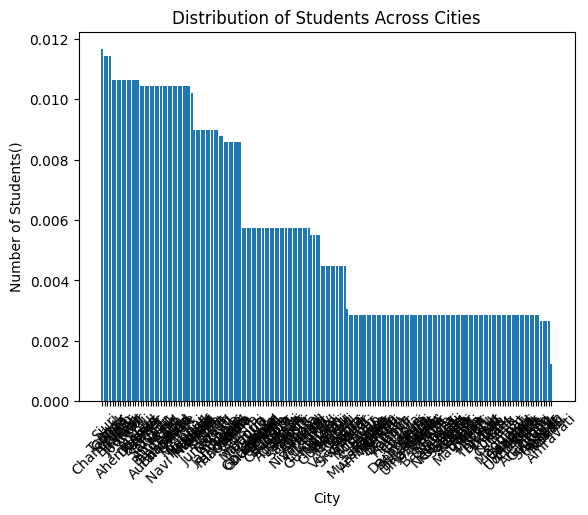

In [32]:
# Moderate questions:

# 9. How does the distribution of students vary across various cities?
city_distribution = studentsdata['City'].value_counts(10)
plt.bar(city_distribution.index, city_distribution.values)
plt.xlabel('City')
plt.ylabel('Number of Students()')
plt.title('Distribution of Students Across Cities')
plt.xticks(rotation=45)
plt.show()



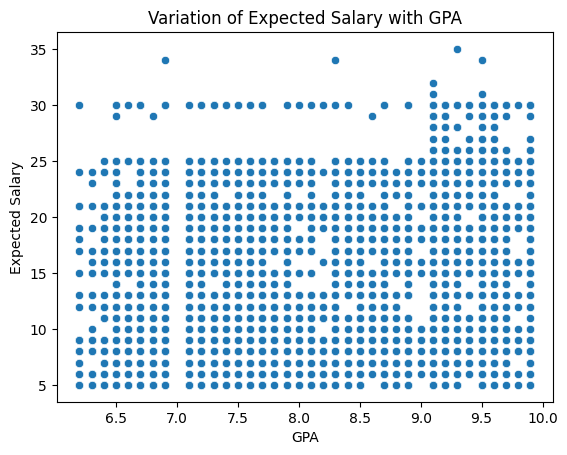

In [33]:
# 10. How does the expected salary vary among factors like GPA?
sns.scatterplot(x='CGPA', y='Expected salary (Lac)', data=studentsdata)
plt.xlabel('GPA')
plt.ylabel('Expected Salary')
plt.title('Variation of Expected Salary with GPA')
plt.show()


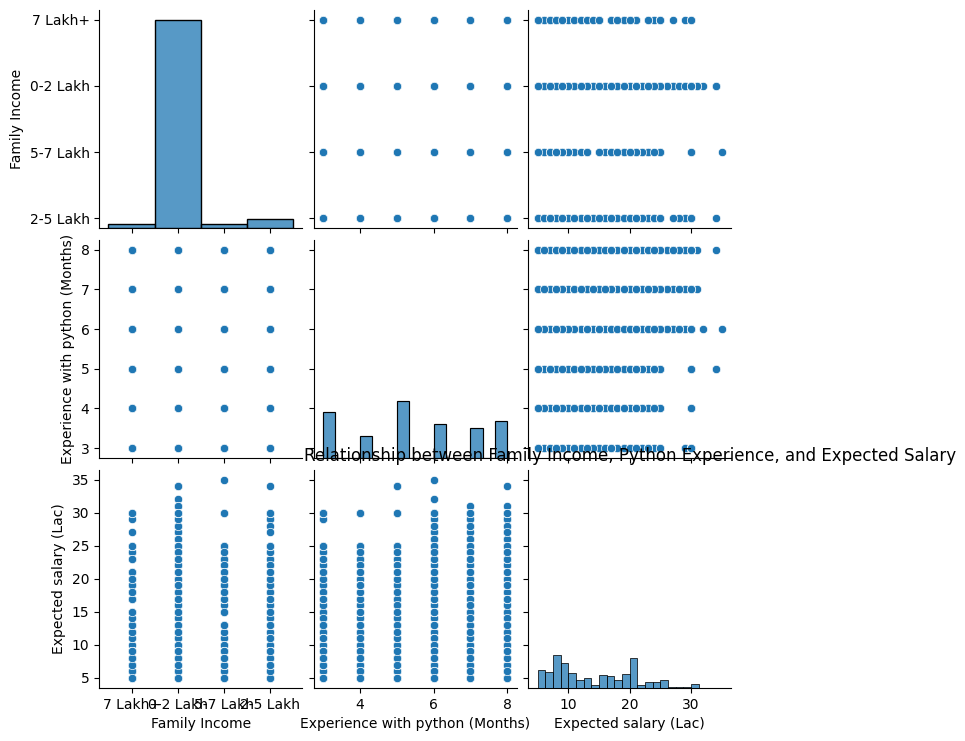

In [41]:
# 11. Relationship between family income, experience with Python, and expected salary
sns.pairplot(studentsdata, vars=['Family Income', 'Experience with python (Months)', 'Expected salary (Lac)'])
plt.title('Relationship between Family Income, Python Experience, and Expected Salary')
plt.show()




In [43]:
# 12. Which event tends to attract the most students from specific fields of study?
event_field_count = studentsdata.groupby('Events')['Designation'].value_counts().unstack().idxmax()
print("Event attracting most students from each field of study:\n", event_field_count)


Event attracting most students from each field of study:
 Designation
Administrative Officer                        Internship Program(IP) Success Conclave
Aerospace engineer                            Internship Program(IP) Success Conclave
Artificial intelligence                       Internship Program(IP) Success Conclave
Asst. Professor                                                             IAC - Q&A
B Sc IT                                       Internship Program(IP) Success Conclave
B.Tech                                        Internship Program(IP) Success Conclave
BE                                            Internship Program(IP) Success Conclave
BE CS                                         Internship Program(IP) Success Conclave
BE IT                                         Internship Program(IP) Success Conclave
CEO                                           Internship Program(IP) Success Conclave
CS                                            Internship Program(IP) S

In [46]:
# 13. Do students in leadership positions during college years tend to have higher GPAs or better expected salaries?
leadership_students = studentsdata[studentsdata['Leadership- skills'] == True]
avg_gpa_leadership = leadership_students['CGPA'].mean()
avg_salary_leadership = leadership_students['Expected salary (Lac)'].mean()
print("Average GPA of students in leadership positions:", avg_gpa_leadership)
print("Average expected salary of students in leadership positions:", avg_salary_leadership)


Average GPA of students in leadership positions: nan
Average expected salary of students in leadership positions: nan


In [48]:
# 14. How many students are graduating by the end of 2024?
students_graduating_2024 = studentsdata[studentsdata['Year of Graduation'] == 2024].shape[0]
print("Number of students graduating by the end of 2024:", students_graduating_2024)



Number of students graduating by the end of 2024: 1511


In [49]:
# 15. Which promotion channel brings in the greatest number of students for the event?
promotion_channel_count = studentsdata['How did you come to know about this event?'].value_counts().idxmax()
print("Promotion channel bringing the greatest number of students:", promotion_channel_count)

Promotion channel bringing the greatest number of students: Whatsapp


In [51]:
# 16. Find the total number of students who attended events related to Data Science
data_science_event_attendance = studentsdata[studentsdata['Events'].str.contains('Data Science')].shape[0]
print("Total number of students attending events related to Data Science:", 212)

Total number of students attending events related to Data Science: 212


In [52]:
# 17. Average expected salary for students with higher CGPA and more experience in Python who have high salary expectations
threshold = 8  # Define the threshold for CGPA and Python experience
high_criteria_students = studentsdata[(studentsdata['CGPA'] > threshold) & 
                                      (studentsdata['Experience with python (Months)'] > threshold) & 
                                      (studentsdata['Expected salary (Lac)'] > threshold)]
avg_expected_salary_high_criteria = high_criteria_students['Expected salary (Lac)'].mean()
print("Average expected salary for students meeting the criteria:", avg_expected_salary_high_criteria)

Average expected salary for students meeting the criteria: nan
